In [2]:
import pandas as pd

In [3]:
card_202007 = pd.read_csv("../card_data/csv/202007.csv")
card_202007

,이용일,결제일,금액,포인트리금액,대분류,중분류,소분류
0,20200701,NaN,1900,19.0,식사,카페,카페7그램
1,20200701,NaN,18100,NaN,생활,편의점,GS25
2,20200701,NaN,-905,NaN,기타,할인,NaN
3,20200702,NaN,20700,NaN,식사,햄버거,롯데리아
4,20200703,NaN,-645,NaN,기타,할인,NaN
...,...,...,...,...,...,...,...
73,20200730,NaN,18000,NaN,식사,한식,NaN
74,20200730,NaN,5500,NaN,식사,카페,바나프레소
75,20200731,20200805.0,62000,NaN,교통,버스 23,NaN
76,20200731,NaN,1500,15.0,식사,카페,카페7그램


In [4]:
card_202007 = card_202007[["이용일", "금액", "대분류", "중분류", "소분류"]]
card_202007

,이용일,금액,대분류,중분류,소분류
0,20200701,1900,식사,카페,카페7그램
1,20200701,18100,생활,편의점,GS25
2,20200701,-905,기타,할인,NaN
3,20200702,20700,식사,햄버거,롯데리아
4,20200703,-645,기타,할인,NaN
...,...,...,...,...,...
73,20200730,18000,식사,한식,NaN
74,20200730,5500,식사,카페,바나프레소
75,20200731,62000,교통,버스 23,NaN
76,20200731,1500,식사,카페,카페7그램


In [5]:
# 대분류 몇 개?
# counts / series 타입
card_202007["대분류"].value_counts()

대분류
식사    45
생활    20
기타     6
유흥     3
교통     2
문화     1
통신     1
Name: count, dtype: int64

In [6]:
# count / dataframe 타입
card_202007.groupby("대분류").count()

,이용일,금액,중분류,소분류
대분류,,,,
교통,2,2,2,0
기타,6,6,6,0
문화,1,1,1,1
생활,20,20,20,20
식사,45,45,45,28
유흥,3,3,3,0
통신,1,1,0,0


In [7]:
# 대분류로 구분한 뒤 그 안에서 중분류 각각 몇 개?
card_202007[["대분류", "중분류"]].value_counts()

대분류  중분류  
식사   카페       25
생활   편의점      18
기타   할인        6
식사   한식        5
     분식        4
     디저트       3
     중식        3
     햄버거       3
유흥   술         3
교통   버스 22     1
     버스 23     1
문화   도서        1
생활   마트        1
     오피스       1
식사   돈까스       1
     순대        1
Name: count, dtype: int64

In [8]:
card_202007.groupby(["대분류", "중분류"]).count()

이용일  금액  소분류
대분류 중분류                
교통  버스 22    1   1    0
    버스 23    1   1    0
기타  할인       6   6    0
문화  도서       1   1    1
생활  마트       1   1    1
    오피스      1   1    1
    편의점     18  18   18
식사  돈까스      1   1    0
    디저트      3   3    0
    분식       4   4    0
    순대       1   1    0
    중식       3   3    0
    카페      25  25   25
    한식       5   5    0
    햄버거      3   3    3
유흥  술        3   3    0

In [9]:
# 버스 뒤의 숫자 자르기
# 문자로 바꾼 뒤 공백 없애고 문자열의 0번지 가지고 옴
card_202007["중분류"].str.split(" ").str.get(0)

0      카페
1     편의점
2      할인
3     햄버거
4      할인
     ... 
73     한식
74     카페
75     버스
76     카페
77      술
Name: 중분류, Length: 78, dtype: object

In [10]:
# 하나하나 문자열로 자른 결과 자체가 시리즈가 됨
# .str : 하나하나 반복하면서 꺼내옴
# .str을 통해 split을 사용
# split은 리스트로 반환함
type(card_202007["중분류"].str.split(" "))

pandas.core.series.Series

In [11]:
card_202007["중분류"].str.split(" ")

0         [카페]
1        [편의점]
2         [할인]
3        [햄버거]
4         [할인]
        ...   
73        [한식]
74        [카페]
75    [버스, 23]
76        [카페]
77         [술]
Name: 중분류, Length: 78, dtype: object

In [12]:
card_202007["중분류"] = card_202007["중분류"].str.split(" ").str.get(0)

C:\Users\heeji\AppData\Local\Temp\ipykernel_26652\2749775660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_202007["중분류"] = card_202007["중분류"].str.split(" ").str.get(0)


In [13]:
card_202007

,이용일,금액,대분류,중분류,소분류
0,20200701,1900,식사,카페,카페7그램
1,20200701,18100,생활,편의점,GS25
2,20200701,-905,기타,할인,NaN
3,20200702,20700,식사,햄버거,롯데리아
4,20200703,-645,기타,할인,NaN
...,...,...,...,...,...
73,20200730,18000,식사,한식,NaN
74,20200730,5500,식사,카페,바나프레소
75,20200731,62000,교통,버스,NaN
76,20200731,1500,식사,카페,카페7그램


In [14]:
card_202007.dtypes

이용일     int64
금액      int64
대분류    object
중분류    object
소분류    object
dtype: object

In [15]:
# 이용일의 타입을 날짜로 바꾸자

# 숫자를 바로 날짜로 바꾸면 안 됨
pd.to_datetime(card_202007["이용일"])

0    1970-01-01 00:00:00.020200701
1    1970-01-01 00:00:00.020200701
2    1970-01-01 00:00:00.020200701
3    1970-01-01 00:00:00.020200702
4    1970-01-01 00:00:00.020200703
                  ...             
73   1970-01-01 00:00:00.020200730
74   1970-01-01 00:00:00.020200730
75   1970-01-01 00:00:00.020200731
76   1970-01-01 00:00:00.020200731
77   1970-01-01 00:00:00.020200731
Name: 이용일, Length: 78, dtype: datetime64[ns]

In [16]:
# 숫자를 문자로 바꾼 뒤 문자를 날짜로 바꿔야 함
# 숫자 -> 문자 -> 날짜
pd.to_datetime(card_202007["이용일"].astype("str"))

0    2020-07-01
1    2020-07-01
2    2020-07-01
3    2020-07-02
4    2020-07-03
        ...    
73   2020-07-30
74   2020-07-30
75   2020-07-31
76   2020-07-31
77   2020-07-31
Name: 이용일, Length: 78, dtype: datetime64[ns]

In [17]:
type(pd.to_datetime(card_202007["이용일"].astype("str")))

pandas.core.series.Series

In [18]:
card_202007["이용일"] = pd.to_datetime(card_202007["이용일"].astype("str"))
card_202007

C:\Users\heeji\AppData\Local\Temp\ipykernel_26652\609532500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_202007["이용일"] = pd.to_datetime(card_202007["이용일"].astype("str"))


,이용일,금액,대분류,중분류,소분류
0,2020-07-01,1900,식사,카페,카페7그램
1,2020-07-01,18100,생활,편의점,GS25
2,2020-07-01,-905,기타,할인,NaN
3,2020-07-02,20700,식사,햄버거,롯데리아
4,2020-07-03,-645,기타,할인,NaN
...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN
74,2020-07-30,5500,식사,카페,바나프레소
75,2020-07-31,62000,교통,버스,NaN
76,2020-07-31,1500,식사,카페,카페7그램


In [19]:
card_202007.dtypes

이용일    datetime64[ns]
금액              int64
대분류            object
중분류            object
소분류            object
dtype: object

In [20]:
# 이용일을 가지고 년, 월, 일, 요일 컬럼을 추가하자
# dt.year : 데이터 타입 년도
card_202007["년도"] = card_202007["이용일"].dt.year

C:\Users\heeji\AppData\Local\Temp\ipykernel_26652\4083662161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_202007["년도"] = card_202007["이용일"].dt.year


In [21]:
card_202007
card_202007.dtypes

이용일    datetime64[ns]
금액              int64
대분류            object
중분류            object
소분류            object
년도              int32
dtype: object

In [22]:
card_202007["월"] = card_202007["이용일"].dt.month

In [23]:
card_202007["일"] = card_202007["이용일"].dt.day
card_202007["요일"] = card_202007["이용일"].dt.weekday

In [24]:
card_202007

,이용일,금액,대분류,중분류,소분류,년도,월,일,요일
0,2020-07-01,1900,식사,카페,카페7그램,2020,7,1,2
1,2020-07-01,18100,생활,편의점,GS25,2020,7,1,2
2,2020-07-01,-905,기타,할인,NaN,2020,7,1,2
3,2020-07-02,20700,식사,햄버거,롯데리아,2020,7,2,3
4,2020-07-03,-645,기타,할인,NaN,2020,7,3,4
...,...,...,...,...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN,2020,7,30,3
74,2020-07-30,5500,식사,카페,바나프레소,2020,7,30,3
75,2020-07-31,62000,교통,버스,NaN,2020,7,31,4
76,2020-07-31,1500,식사,카페,카페7그램,2020,7,31,4


In [25]:
# 월요일이 0부터 시작
card_202007["요일_영어"] = card_202007["이용일"].dt.day_name()
card_202007

,이용일,금액,대분류,중분류,소분류,년도,월,일,요일,요일_영어
0,2020-07-01,1900,식사,카페,카페7그램,2020,7,1,2,Wednesday
1,2020-07-01,18100,생활,편의점,GS25,2020,7,1,2,Wednesday
2,2020-07-01,-905,기타,할인,NaN,2020,7,1,2,Wednesday
3,2020-07-02,20700,식사,햄버거,롯데리아,2020,7,2,3,Thursday
4,2020-07-03,-645,기타,할인,NaN,2020,7,3,4,Friday
...,...,...,...,...,...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN,2020,7,30,3,Thursday
74,2020-07-30,5500,식사,카페,바나프레소,2020,7,30,3,Thursday
75,2020-07-31,62000,교통,버스,NaN,2020,7,31,4,Friday
76,2020-07-31,1500,식사,카페,카페7그램,2020,7,31,4,Friday


In [26]:
# x를 하나하나 꺼내 오는데 x는 row 한줄 한줄 자체
# x["요일"] : 원래 숫자 2

# apply
# 0 or ‘index’: apply function to each column.
# 1 or ‘columns’: apply function to each row.

weekday_list = ["월", "화", "수", "목", "금", "토", "일"]
card_202007["요일"] = card_202007.apply(lambda x: weekday_list[x["요일"]], axis=1)
card_202007

,이용일,금액,대분류,중분류,소분류,년도,월,일,요일,요일_영어
0,2020-07-01,1900,식사,카페,카페7그램,2020,7,1,수,Wednesday
1,2020-07-01,18100,생활,편의점,GS25,2020,7,1,수,Wednesday
2,2020-07-01,-905,기타,할인,NaN,2020,7,1,수,Wednesday
3,2020-07-02,20700,식사,햄버거,롯데리아,2020,7,2,목,Thursday
4,2020-07-03,-645,기타,할인,NaN,2020,7,3,금,Friday
...,...,...,...,...,...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN,2020,7,30,목,Thursday
74,2020-07-30,5500,식사,카페,바나프레소,2020,7,30,목,Thursday
75,2020-07-31,62000,교통,버스,NaN,2020,7,31,금,Friday
76,2020-07-31,1500,식사,카페,카페7그램,2020,7,31,금,Friday


In [27]:
# 년도 월 일 요일 금액 대분류 중분류 소분류를 데이터 프레임에 넣겠다
card = card_202007[["년도", "월", "일", "요일", "금액", "대분류", "중분류", "소분류"]]
card

,년도,월,일,요일,금액,대분류,중분류,소분류
0,2020,7,1,수,1900,식사,카페,카페7그램
1,2020,7,1,수,18100,생활,편의점,GS25
2,2020,7,1,수,-905,기타,할인,NaN
3,2020,7,2,목,20700,식사,햄버거,롯데리아
4,2020,7,3,금,-645,기타,할인,NaN
...,...,...,...,...,...,...,...,...
73,2020,7,30,목,18000,식사,한식,NaN
74,2020,7,30,목,5500,식사,카페,바나프레소
75,2020,7,31,금,62000,교통,버스,NaN
76,2020,7,31,금,1500,식사,카페,카페7그램


In [28]:
card.dtypes

년도      int32
월       int32
일       int32
요일     object
금액      int64
대분류    object
중분류    object
소분류    object
dtype: object

In [29]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [30]:
import matplotlib.pyplot as plt

In [31]:
plt.rc("font", family = "Malgun Gothic")

In [32]:
# 대분류 기준으로 파이차트
category = card["대분류"].value_counts()

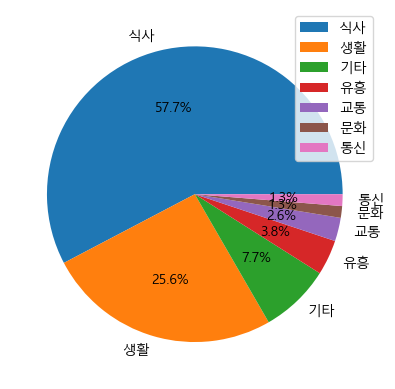

In [33]:
plt.pie(x=category, labels=category.index, autopct="%1.1f%%")
plt.legend()
plt.show()

<Axes: ylabel='count'>

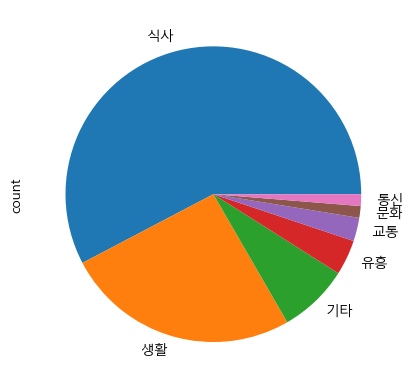

In [34]:
# 판다스에서 바로 그래프 그릴 수 있음
category.plot.pie(y=category)

In [35]:
# 요일별 바 차트 그리기
# reindex : 순서대로 월화수목금토일 다시 만들어줌

weekday_list = ["월", "화", "수", "목", "금", "토", "일"]
card_day = card.groupby(["요일"])[["금액"]].sum().reindex(weekday_list)
card_day

,금액
요일,
월,104000
화,88830
수,156855
목,218100
금,169475
토,89640
일,8100


<BarContainer object of 7 artists>

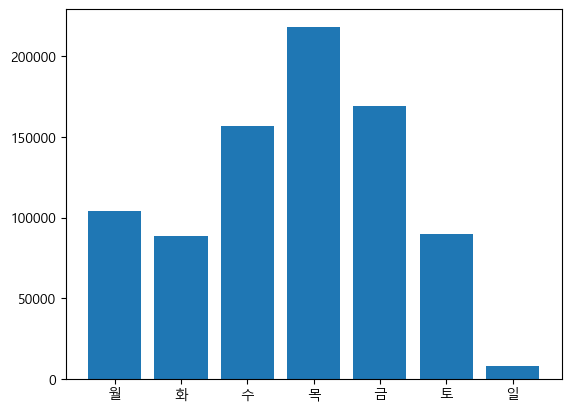

In [36]:
plt.bar(card_day.index, card_day["금액"])

In [37]:
import seaborn as sns

In [38]:
card_day2 = card.groupby(["요일"])[["금액"]].sum().reindex(weekday_list).reset_index()
card_day2

,요일,금액
0,월,104000
1,화,88830
2,수,156855
3,목,218100
4,금,169475
5,토,89640
6,일,8100


In [39]:
# 컬럼명도 바꿀 수 있음
card_day2.columns = ["day", "money"]

In [40]:
card_day2

,day,money
0,월,104000
1,화,88830
2,수,156855
3,목,218100
4,금,169475
5,토,89640
6,일,8100


<Axes: xlabel='day', ylabel='money'>

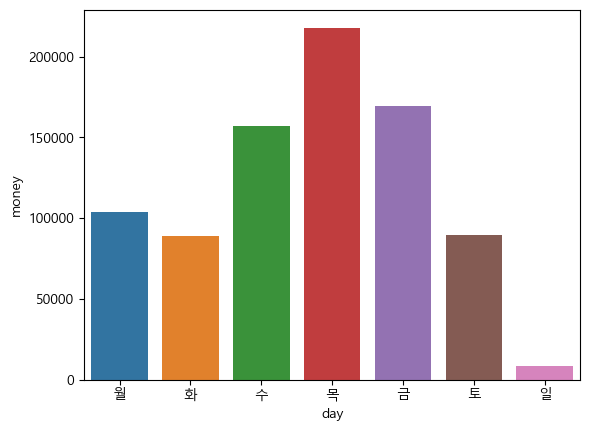

In [41]:
sns.barplot(data=card_day2, x="day", y="money")

In [42]:
card_202007

,이용일,금액,대분류,중분류,소분류,년도,월,일,요일,요일_영어
0,2020-07-01,1900,식사,카페,카페7그램,2020,7,1,수,Wednesday
1,2020-07-01,18100,생활,편의점,GS25,2020,7,1,수,Wednesday
2,2020-07-01,-905,기타,할인,NaN,2020,7,1,수,Wednesday
3,2020-07-02,20700,식사,햄버거,롯데리아,2020,7,2,목,Thursday
4,2020-07-03,-645,기타,할인,NaN,2020,7,3,금,Friday
...,...,...,...,...,...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN,2020,7,30,목,Thursday
74,2020-07-30,5500,식사,카페,바나프레소,2020,7,30,목,Thursday
75,2020-07-31,62000,교통,버스,NaN,2020,7,31,금,Friday
76,2020-07-31,1500,식사,카페,카페7그램,2020,7,31,금,Friday


In [43]:
meal_pay = card_202007.loc[card_202007["대분류"] == "식사", "중분류"]
print(meal_pay)

0      카페
3     햄버거
7      카페
9      한식
10     카페
11     카페
14     카페
15     카페
16     카페
20     한식
21     카페
22     순대
31     카페
33    디저트
34     분식
35     카페
37     카페
38     중식
41     카페
42     카페
43     중식
45     카페
46     카페
47     한식
48     카페
50    디저트
52     카페
54     한식
55     중식
56    돈까스
57     분식
58     카페
60    디저트
61     분식
63     카페
64     분식
65     카페
67     카페
68     카페
70     카페
71    햄버거
72    햄버거
73     한식
74     카페
76     카페
Name: 중분류, dtype: object


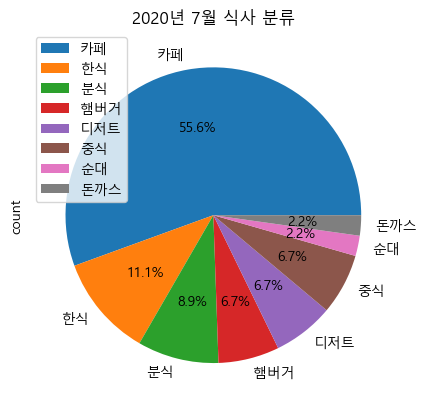

In [53]:
meal_pay.value_counts().plot.pie(autopct="%1.1f%%")
plt.legend(loc='upper left')
plt.title("2020년 7월 식사 분류")
plt.show()

In [54]:
dis_price = card_202007.loc[card_202007["중분류"] == "할인"]
dis_price

,이용일,금액,대분류,중분류,소분류,년도,월,일,요일,요일_영어
2,2020-07-01,-905,기타,할인,NaN,2020,7,1,수,Wednesday
4,2020-07-03,-645,기타,할인,NaN,2020,7,3,금,Friday
8,2020-07-03,-2180,기타,할인,NaN,2020,7,3,금,Friday
17,2020-07-09,-2500,기타,할인,NaN,2020,7,9,목,Thursday
23,2020-07-11,-1000,기타,할인,NaN,2020,7,11,토,Saturday
39,2020-07-15,-2000,기타,할인,NaN,2020,7,15,수,Wednesday


In [58]:
dis_price_sum = dis_price["금액"].sum()
dis_price_sum_abs = abs(dis_price_sum)
dis_price_sum_abs

9230

In [59]:
total_price = card_202007["금액"].sum()
total_price

835000

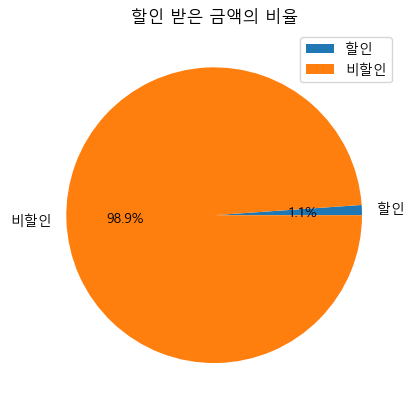

In [61]:
labels = ["할인", "비할인"]

plt.pie([dis_price_sum_abs, total_price - dis_price_sum_abs], labels=labels ,autopct='%1.1f%%')
plt.title("할인 받은 금액의 비율")
plt.legend(loc='upper right')
plt.show()

In [ ]:
card_202007

,이용일,금액,대분류,중분류,소분류,년도,월,일,요일,요일_영어
0,2020-07-01,1900,식사,카페,카페7그램,2020,7,1,수,Wednesday
1,2020-07-01,18100,생활,편의점,GS25,2020,7,1,수,Wednesday
2,2020-07-01,-905,기타,할인,NaN,2020,7,1,수,Wednesday
3,2020-07-02,20700,식사,햄버거,롯데리아,2020,7,2,목,Thursday
4,2020-07-03,-645,기타,할인,NaN,2020,7,3,금,Friday
...,...,...,...,...,...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN,2020,7,30,목,Thursday
74,2020-07-30,5500,식사,카페,바나프레소,2020,7,30,목,Thursday
75,2020-07-31,62000,교통,버스,NaN,2020,7,31,금,Friday
76,2020-07-31,1500,식사,카페,카페7그램,2020,7,31,금,Friday


<function matplotlib.pyplot.show(close=None, block=None)>

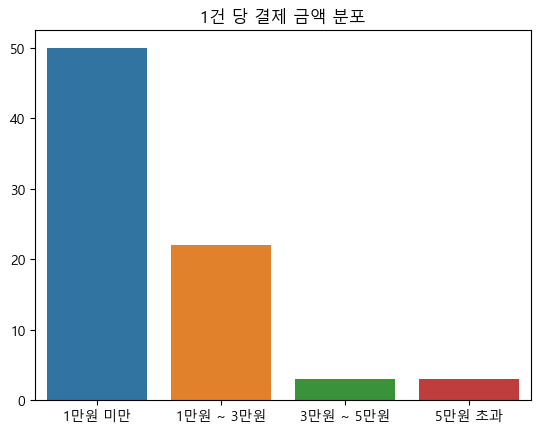

In [70]:
pay = card_202007["금액"]
pay_1 = (pay < 10000).sum()
pay_2 = ((10000 <= pay) & (pay < 30000)).sum()
pay_3 = ((30000 <= pay) & (pay < 50000)).sum()
pay_4 = (pay > 50000).sum()

x = ["1만원 미만", "1만원 ~ 3만원", "3만원 ~ 5만원", "5만원 초과"]
y = [pay_1, pay_2, pay_3, pay_4]

sns.barplot(x=x, y=y)

plt.title("1건 당 결제 금액 분포")

plt.show

In [73]:
card_202007["누적금액"] = card_202007["금액"].cumsum()
card_202007

,이용일,금액,대분류,중분류,소분류,년도,월,일,요일,요일_영어,누적금액
0,2020-07-01,1900,식사,카페,카페7그램,2020,7,1,수,Wednesday,1900
1,2020-07-01,18100,생활,편의점,GS25,2020,7,1,수,Wednesday,20000
2,2020-07-01,-905,기타,할인,NaN,2020,7,1,수,Wednesday,19095
3,2020-07-02,20700,식사,햄버거,롯데리아,2020,7,2,목,Thursday,39795
4,2020-07-03,-645,기타,할인,NaN,2020,7,3,금,Friday,39150
...,...,...,...,...,...,...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN,2020,7,30,목,Thursday,759000
74,2020-07-30,5500,식사,카페,바나프레소,2020,7,30,목,Thursday,764500
75,2020-07-31,62000,교통,버스,NaN,2020,7,31,금,Friday,826500
76,2020-07-31,1500,식사,카페,카페7그램,2020,7,31,금,Friday,828000


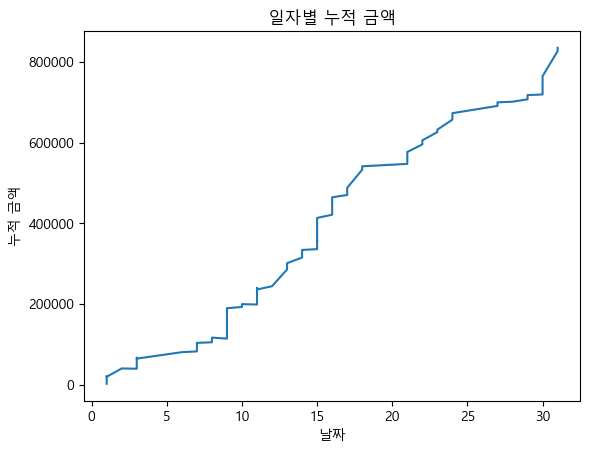

In [76]:
plt.plot(card_202007['이용일'].dt.day, card_202007['누적금액'])
plt.title('일자별 누적 금액')
plt.xlabel('날짜')
plt.ylabel('누적 금액')
plt.show()

In [77]:
card_202007

,이용일,금액,대분류,중분류,소분류,년도,월,일,요일,요일_영어,누적금액
0,2020-07-01,1900,식사,카페,카페7그램,2020,7,1,수,Wednesday,1900
1,2020-07-01,18100,생활,편의점,GS25,2020,7,1,수,Wednesday,20000
2,2020-07-01,-905,기타,할인,NaN,2020,7,1,수,Wednesday,19095
3,2020-07-02,20700,식사,햄버거,롯데리아,2020,7,2,목,Thursday,39795
4,2020-07-03,-645,기타,할인,NaN,2020,7,3,금,Friday,39150
...,...,...,...,...,...,...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN,2020,7,30,목,Thursday,759000
74,2020-07-30,5500,식사,카페,바나프레소,2020,7,30,목,Thursday,764500
75,2020-07-31,62000,교통,버스,NaN,2020,7,31,금,Friday,826500
76,2020-07-31,1500,식사,카페,카페7그램,2020,7,31,금,Friday,828000


일
1      1900
2     20700
3     10900
6     16000
7     12400
8     13100
9     14000
10    10100
13     1500
14    29530
15    22900
16    49100
17    23600
18     8400
21    25900
22    28900
23    22000
24    33100
27    19900
28     1500
29     6000
30    46900
31     1500
Name: 금액, dtype: int64


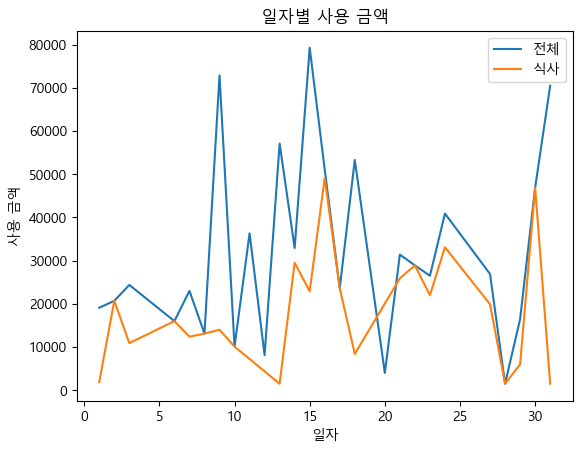

In [106]:
data = card_202007

filtered_data = data[data['대분류'] == '식사']

daily_amount_total = data.groupby('일')['금액'].sum()
daily_amount_filtered = filtered_data.groupby('일')['금액'].sum()


plt.plot(daily_amount_total.index, daily_amount_total.values, label='전체')
plt.plot(daily_amount_filtered.index, daily_amount_filtered.values, label='식사')


plt.title('일자별 사용 금액')
plt.xlabel('일자')
plt.ylabel('사용 금액')
plt.legend()
plt.show()